# Ex. 1 Holiday Anomalies Plot


Reproduce *as best you can* the first of the 3 figures from Andrew Gelman's blog post (your plot may have small differences)

![](../data/births_gp100.png)

**1.3.1:** Reproduce the births line in a plot. Hint: Make the x axis a `pd.datetime` object

**1.3.2:** Reproduce the `smoothed` line. Hint: use a rolling window average

**1.3.3:** Reproduce the entire figure with the mean line as a horizontal. You can make the y axis total births instead of a % deviation from mean axis (they'll look the same anyway)

In [161]:
#ex 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [162]:
data = pd.read_csv('../data/births.csv') #loading data
df = data.copy() #make copy of original data
df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [163]:
df.info() #getting information about having null data and tyoe of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [164]:
df.isna().sum() # checking for having nan value

year        0
month       0
day       480
gender      0
births      0
dtype: int64

In [165]:
df['day'].fillna(method='ffill', inplace=True)
df.day.isna().sum()

0

In [166]:
df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [167]:
outlier = df[df.day==99]['day']
outlier.count()

350

In [168]:
outlier

62       99.0
63       99.0
126      99.0
127      99.0
190      99.0
         ... 
14572    99.0
14635    99.0
14696    99.0
14697    99.0
14944    99.0
Name: day, Length: 350, dtype: float64

In [169]:
df = df[df['day']!=99.0]

In [170]:
(df.day==99).sum()

0

In [171]:
df.insert(loc=0, column='date',
          value=pd.to_datetime(
              df['year'].astype(str) 
              + '/' 
              + df['month'].astype(str)
              + '/'
              + df['month'].astype(str)))

df.head()

,date,year,month,day,gender,births
0,1969-01-01,1969,1,1.0,F,4046
1,1969-01-01,1969,1,1.0,M,4440
2,1969-01-01,1969,1,2.0,F,4454
3,1969-01-01,1969,1,2.0,M,4548
4,1969-01-01,1969,1,3.0,F,4548


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15197 entries, 0 to 15546
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    15197 non-null  datetime64[ns]
 1   year    15197 non-null  int64         
 2   month   15197 non-null  int64         
 3   day     15197 non-null  float64       
 4   gender  15197 non-null  object        
 5   births  15197 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 831.1+ KB


In [173]:
dfy = df.groupby(['month', 'day']).mean('birth').reset_index()
dfy

,month,day,year,births
0,1,1.0,1978.5,4009.225
1,1,2.0,1978.5,4247.400
2,1,3.0,1978.5,4500.900
3,1,4.0,1978.5,4571.350
4,1,5.0,1978.5,4603.625
...,...,...,...,...
367,12,27.0,1978.5,4850.150
368,12,28.0,1978.5,5044.200
369,12,29.0,1978.5,5120.150
370,12,30.0,1978.5,5172.350


In [174]:
df['birth_ratio'] = df.births/dfy.births

<AxesSubplot:xlabel='day', ylabel='births'>

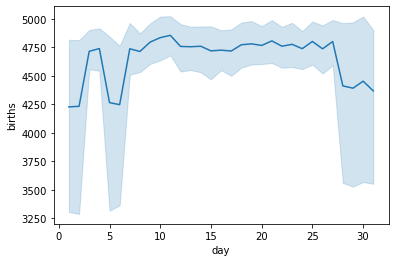

In [176]:
sns.lineplot(x=dfy.day, y=df.births)